#**BACKPROPAGATION**

###AIM: IMPLEMENTATION OF BACKPROPAGATION FOR A MULTI LAYER PERCEPTRON

Backpropagation is an algorithm used to train artificial neural networks in machine learning. It is a supervised learning method that involves adjusting the weights of the network to minimize the error between the predicted output and the true output.

The backpropagation algorithm works by propagating the error from the output layer back through the network to adjust the weights of each layer. It involves two main steps:

Forward propagation: The input is passed through the network, and the output is calculated by applying the weights to each layer and passing the result through an activation function.

Backward propagation: The error between the predicted output and the true output is calculated, and the weights are adjusted to minimize the error using gradient descent.

##Forward Propagation
The input to each layer is calculated by multiplying the output of the previous layer by the weights and adding a bias term:

$$ z^{(l)} = w^{(l)} a^{(l-1)} + b^{(l)} $$

where $z^{(l)}$ is the input to layer $l$, $w^{(l)}$ is the weight matrix for layer $l$, $a^{(l-1)}$ is the output of layer $l-1$, $b^{(l)}$ is the bias term for layer $l$.

The output of each layer is then passed through an activation function:

$$ a^{(l)} = \sigma(z^{(l)}) $$

where $\sigma$ is the activation function.

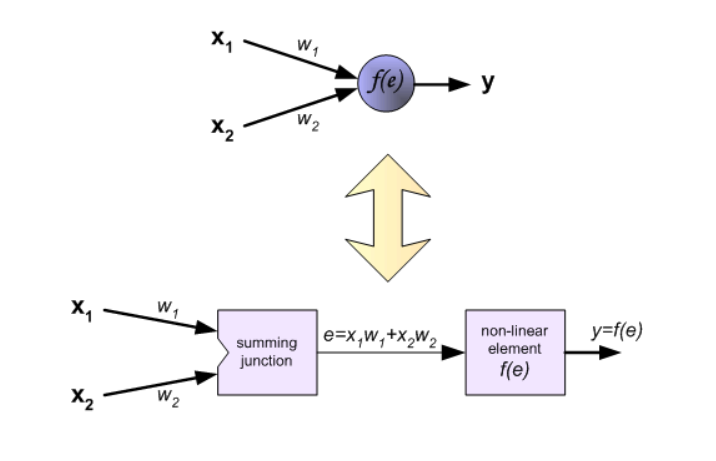

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Backward Propagation
The error between the predicted output and the true output is calculated using a loss function such as mean squared error:

$$ E = \frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $E$ is the error, $n$ is the number of examples, $y_i$ is the true output, and $\hat{y}_i$ is the predicted output.

The gradient of the error with respect to the weights is calculated using the chain rule:

$$ \frac{\partial E}{\partial w_{ij}^{(l)}} = \frac{\partial E}{\partial z_j^{(l)}} \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}} $$

where $w_{ij}^{(l)}$ is the weight connecting neuron $i$ in layer $l-1$ to neuron $j$ in layer $l$, and $\frac{\partial E}{\partial z_j^{(l)}}$ is the error signal for neuron $j$ in layer $l$.

The error signal for each neuron is calculated by propagating the error back through the network using the chain rule:

$$ \frac{\partial E}{\partial z_j^{(l)}} = \sum_k \frac{\partial E}{\partial z_k^{(l+1)}} \frac{\partial z_k^{(l+1)}}{\partial z_j^{(l)}} \frac{\partial \sigma(z_j^{(l)})}{\partial z_j^{(l)}} $$

where $k$ is the index of neurons in the next layer, $\frac{\partial z_k^{(l+1)}}{\partial z_j^{(l)}}$ is the derivative of the input to neuron $k$ with respect to the output of neuron $j$ in layer $

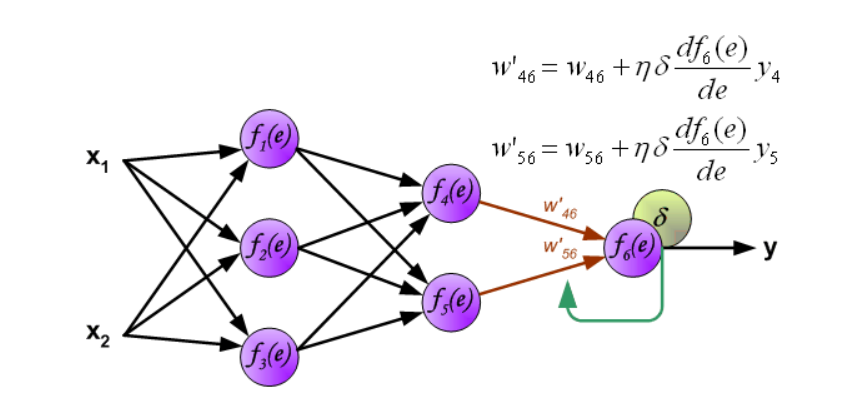

In [ ]:
def tanh(x):
    return np.tanh(x)


Hyperbolic Tangent (tanh) Function
The hyperbolic tangent (tanh) function is defined as:

$$ \text{tanh}(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} $$

where $z$ is the input to the function. The tanh function maps any real-valued number to a value between -1 and 1.

The derivative of the tanh function is:

$$ \frac{d\text{tanh}}{dz} = 1 - \text{tanh}(z)^2 $$

The tanh function is commonly used in the hidden layers of neural networks as it provides stronger gradients than the sigmoid function, which can result in faster convergence during training.

In [ ]:

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


##Sigmoid Function
The sigmoid function is defined as:

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

where $z$ is the input to the function. The sigmoid function maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability.

The derivative of the sigmoid function is:

$$ \frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)) $$

The sigmoid function is commonly used in the output layer of binary classification problems, where the output represents the probability of a class.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x*(1.0-x)

In [ ]:
# np.random.seed(1)

class Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 2*np.random.random((n_inputs, n_neurons))-1
        self.biases = 2*np.random.random((1, n_neurons))-1

    def calculate_output(self, input):
        self.input=np.array(input)
        weighted_sum = np.dot(self.input,self.weights) + self.biases
        self.output = self.activation_function(weighted_sum)
        return self.output


    def calculate_delta(self, error, output):
        return error * self.derivative_activation_function(output)

    def update_weights(self, input, delta, learning_rate):
        if delta.shape[0] != input.shape[0]:
            input=input.reshape(1,-1)
        self.weights += learning_rate * np.dot(delta.T,input).T
        self.biases += learning_rate * np.sum(delta)
        

    def activation_function(self, x):
        return sigmoid(x)

    def derivative_activation_function(self, x):
        return sigmoid_derivative(x)


class NeuralNetwork:
    def __init__(self, layers):
        # layer=[Layer(layers[0],layers[0])]
        layer=[]
        for i in range(0,len(layers)-1):
          layer.append(Layer(layers[i],layers[i+1]))
        # self.layers = layer[1:]
        self.layers = layer
        self.itr=[]
        self.err=[]
        

    def predict(self, input):
        output = input
        for layer in self.layers:
            output = layer.calculate_output(output)
        return output
    
    def predict_(self, input):
        output = input
        for layer in self.layers:
            output = layer.calculate_output(output)
        # print(type(output))
        return np.round_(output)


    def train(self, input, expected_output, learning_rate):
        output = self.predict(input)
        error = expected_output - output
        for i in range(len(self.layers)-1, -1, -1):
            layer = self.layers[i]
            input=layer.input
            output = layer.output
            if i == len(self.layers) - 1:
                layer.delta =layer.calculate_delta(error, output)
            else:
                next_layer = self.layers[i+1]
                layer.delta = layer.calculate_delta(np.dot(next_layer.delta, next_layer.weights.T), output)
            self.layers[i]=layer

        for i in range(0,len(self.layers)):
            layer=self.layers[i]
            layer.update_weights(layer.input,layer.delta,learning_rate)
            self.layers[i]=layer

    def plot(self):
        plt.plot(self.itr,self.err)
        plt.title("Iterations vs Error")
        plt.xlabel("Iterations")
        plt.ylabel("Error")

    def plot1(self,lr,itr):
        plt.plot(lr,itr)
        plt.title("Learning Rate vs No of Iterations")
        plt.xlabel("Learning Rate")
        plt.ylabel("No of Iterations")

    def fit(self,e,lr):
        for i in range(e):
            for j in range(len(X)):
                self.train(X[j], y[j], lr)
            if i%10000==0:
              self.itr.append(i)
              output = nn.predict(X[0])
              error = abs(float(y[0] - float(output)))
              self.err.append(error)      

  


In [ ]:
# Example: Training a neural network to learn the XOR function

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# input_layer = Layer(2, 2)
# hidden_layer_1 = Layer(2, 2)
# output_layer = Layer(2, 1)

# nn = NeuralNetwork([input_layer, hidden_layer_1, output_layer])

# or

nn = NeuralNetwork([2,2,1])
nn.fit(100000,0.7)

print(nn.predict_(np.array([0, 0]))) # Expected output: [0]
print(nn.predict_(np.array([0, 1]))) # Expected output: [1]
print(nn.predict_(np.array([1, 0]))) # Expected output: [1]
print(nn.predict_(np.array([1, 1]))) # Expected output: [0]

[[0.]]
[[1.]]
[[1.]]
[[0.]]


##Iterations Vs Error

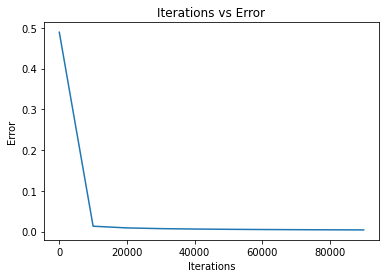

In [ ]:
nn.plot()

##Learning rate vs no of iterations

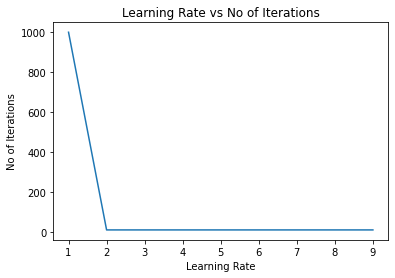

In [ ]:
nn = NeuralNetwork([2,2,1])
itr=[]
lr=[]

for i in range(1,10):
  e=1
  j=1
  while(e!=0 and j<100000):
    e=0
    j*=10
    nn.fit(10*j,i)
    for l in range(len(X)):
      if nn.predict_(np.array(X[l]))!=y[l]:
        e+=1
        break

  itr.append(j)
  lr.append(i)

nn.plot1(lr,itr)

Consider a two-layer feedforward ANN with two inputs a and b, one hidden unit c, 
and one output unit d. This network has five weights (w 
ca 
, w 
cb 
, w 
c0 
, w 
dc 
, w 
d0 
), where 
w 
x0 
represents the threshold weight for unit x. Initialize these weights to the values 
(0.1, 0.1, 0.1, 0.1, 0.1), then give their values after each of the first two training 
iterations of the BACKPROPAGATION algorithm. Assume learning rate  = 0.3, 
momentum  = 0.9, incremental weight updates, and the following training 
examples:

  
a b d

1 0 1    
  0 1 0

Import

Activation Function

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
inputs = np.array([[1, 0], [0, 1]])
expected_output = np.array([[1], [0]])

weights_input_hidden = 0.1 * np.ones((2, 1))
weights_hidden_output = 0.1 * np.ones((1, 1))
bias_hidden = 0.1 * np.ones((1, 1))
bias_output = 0.1 * np.ones((1, 1))

num_iterations = 10000
learning_rate = 0.3
momentum=0.9

in order to predict the unknown outputs based on unknown inputs we need train the machine with some of the cases,To do so we use the function train ann

this is exclusively meant for feed forward network i.e the network where there will be one input layer,single dimensional hidden layer and one output layer 


some of  the terminologies 
============================ 
learning rate: it is the value which determines the fastness or slowness of optimization of weights 
in general lower the learning rate,more data will be covered and will be eloquent in determining new inputs 

momentum:- it is used to avoid the gradient descent to be struck in the local minima and used to determine how the model is influenced by previous weights.


bias:-it is the definition of difference means meant for distinguishing the different layers in a neural network 


necessiry of weights:->>> proper evaluation
weight_input_hidden:-the weights that are connected to the hidden 
weights_hidden_output:-weights that are connected bewteen hidden layer and output

previous:- this is meant for supporting the momentum factor

eg:-

$A=[19,23,43]$

$B=[44,45,18]$


$(A)*(B)^T= [19,23,43]*[44,45,18] $


##formulations 

>$y=\sum_{i=1}^n(w_i.x_i)$

>error=actual-calculated

>delta=y*error

>Change in weight = ( Learning rate * delta * input ) + ( Moment * previous_iteration_weight )

>new_weight = old weight + change_in_weight










In [ ]:
def train_ann(inputs, expected_output, num_iterations, learning_rate, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, momentum):
    previous_weights_hidden_output_change = np.zeros_like(weights_hidden_output)
    previous_weights_input_hidden_change = np.zeros_like(weights_input_hidden)
    previous_bias_hidden_change = np.zeros_like(bias_hidden)
    previous_bias_output_change = np.zeros_like(bias_output)
    e1=[]
    e2=[]

    for iteration in range(num_iterations):
        input_layer = inputs
        hidden_layer = sigmoid(np.dot(input_layer, weights_input_hidden) + bias_hidden)
        output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) + bias_output)

        rounded_output = np.round(output_layer)
        if np.array_equal(rounded_output, expected_output):
          print(f"Iteration{iteration} Expected:{expected_output} Output:{output_layer} Rounded Output:{rounded_output}")
          break

        error = expected_output - output_layer
        e1=np.append(e1,error[0])
        e2=np.append(e2,error[1])
        d_output_layer = error * sigmoid_derivative(output_layer)    
        error_hidden_layer = d_output_layer.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer)

        weights_hidden_output_change = learning_rate * hidden_layer.T.dot(d_output_layer) + momentum * previous_weights_hidden_output_change
        weights_input_hidden_change = learning_rate * input_layer.T.dot(d_hidden_layer) + momentum * previous_weights_input_hidden_change
        bias_output_change = learning_rate * np.sum(d_output_layer) + momentum * previous_bias_output_change
        bias_hidden_change = learning_rate * np.sum(d_hidden_layer) + momentum * previous_bias_hidden_change

        weights_hidden_output += weights_hidden_output_change
        weights_input_hidden += weights_input_hidden_change
        bias_output += bias_output_change
        bias_hidden += bias_hidden_change

        previous_weights_hidden_output_change = weights_hidden_output_change
        previous_weights_input_hidden_change = weights_input_hidden_change
        previous_bias_hidden_change = bias_hidden_change
        previous_bias_output_change = bias_output_change
        print(f"Iteration:{iteration} Output:{output_layer}weights1:{weights_input_hidden} weights2:{weights_hidden_output_change} bias1:{bias_hidden} bias2:{bias_output}")

    return output_layer, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output,e1,e2,iteration


output, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, e1,e2,iterations = train_ann(inputs, expected_output, num_iterations, learning_rate, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output,momentum)
print(iterations)

Iteration:0 Output:[[0.53866848]
 [0.53866848]]weights1:[[0.10085128]
 [0.09900601]] weights2:[[-0.00317011]] bias1:[[0.09985729]] bias2:[[0.09423442]]
Iteration:1 Output:[[0.53680624]
 [0.53679525]]weights1:[[0.10244547]
 [0.09715163]] weights2:[[-0.00585454]] bias1:[[0.0995971]] bias2:[[0.08355507]]
Iteration:2 Output:[[0.53335598]
 [0.53332631]]weights1:[[0.10466466]
 [0.0945857 ]] weights2:[[-0.00795718]] bias1:[[0.09925036]] bias2:[[0.06896442]]
Iteration:3 Output:[[0.52864138]
 [0.52858976]]weights1:[[0.10738568]
 [0.09146391]] weights2:[[-0.0094196]] bias1:[[0.09884959]] bias2:[[0.05155412]]
Iteration:4 Output:[[0.52301739]
 [0.52294502]]weights1:[[0.11048449]
 [0.08794066]] weights2:[[-0.01022033]] bias1:[[0.09842515]] bias2:[[0.03244445]]
Iteration:5 Output:[[0.51685153]
 [0.5167632 ]]weights1:[[0.11384071]
 [0.08416162]] weights2:[[-0.01037265]] bias1:[[0.09800233]] bias2:[[0.01272704]]
Iteration:6 Output:[[0.5105051 ]
 [0.51040777]]weights1:[[0.11734216]
 [0.08025761]] weigh

Drawing plot for Errors

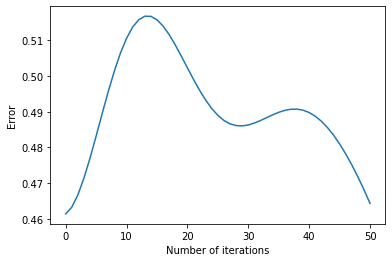

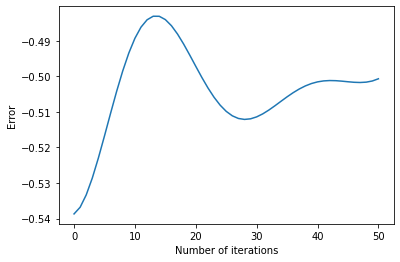

In [ ]:
# print(e1)
# print(e2)
plt.plot(range(len(e1)), e1)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()
print("\n")
plt.plot(range(len(e2)), e2)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

Testing 

In [ ]:
def predict(inputs, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    hidden_layer = sigmoid(np.dot(inputs, weights_input_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden_layer, weights_hidden_output) + bias_output)
    return np.round(output)


In [ ]:
inputs = np.array([[1, 0], [0, 1]])
output = predict(inputs, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
print("Prediction:", output)
# expected outputs are 1,0

Prediction: [[1.]
 [0.]]


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# np.random.seed(1)

class Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 2*np.random.random((n_inputs, n_neurons))-1
        self.biases = 2*np.random.random((1, n_neurons))-1

    def calculate_output(self, input):
        self.input=np.array(input)
        weighted_sum = np.dot(self.input,self.weights) + self.biases
        self.output = self.activation_function(weighted_sum)
        return self.output


    def calculate_delta(self, error, output):
        return error * self.derivative_activation_function(output)

    def update_weights(self, input, delta, learning_rate):
        if delta.shape[0] != input.shape[0]:
            input=input.reshape(1,-1)
        self.weights += learning_rate * np.dot(delta.T,input).T
        self.biases += learning_rate * np.sum(delta)
        

    def activation_function(self, x):
        return sigmoid(x)

    def derivative_activation_function(self, x):
        return sigmoid_derivative(x)


class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers[1:]

    def predict(self, input):
        output = input
        for layer in self.layers:
            output = layer.calculate_output(output)
        return output


    def train(self, input, expected_output, learning_rate):
        output = self.predict(input)
        error = expected_output - output
        for i in range(len(self.layers)-1, -1, -1):
            layer = self.layers[i]
            input=layer.input
            output = layer.output
            if i == len(self.layers) - 1:
                layer.delta =layer.calculate_delta(error, output)
            else:
                next_layer = self.layers[i+1]
                layer.delta = layer.calculate_delta(np.dot(next_layer.delta, next_layer.weights.T), output)
            self.layers[i]=layer

        for i in range(0,len(self.layers)):
            layer=self.layers[i]
            layer.update_weights(layer.input,layer.delta,learning_rate)
            self.layers[i]=layer

  
# Example: Training a neural network to learn the XOR function

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_layer = Layer(2, 2)
hidden_layer_1 = Layer(2, 2)
output_layer = Layer(2, 1)

nn = NeuralNetwork([input_layer, hidden_layer_1, output_layer])

for i in range(10000):
    for j in range(len(X)):
        nn.train(X[j], y[j], 0.2)

print(nn.predict(np.array([0, 0]))) # Expected output: [0]
print(nn.predict(np.array([0, 1]))) # Expected output: [1]
print(nn.predict(np.array([1, 0]))) # Expected output: [1]
print(nn.predict(np.array([1, 1]))) # Expected output: [0]

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # return sigmoid(x)*(1.0-sigmoid(x))
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return np.array(x >= 0).astype('int')


In [ ]:

class Layer:
    def __init__(self, n_inputs, n_neurons):
        # self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(1 / n_inputs)
        self.weights = 2*np.random.random((n_inputs, n_neurons))-1
        self.biases = 2*np.random.random((1, n_neurons))-1
        # self.weights = np.around(np.random.randn(n_inputs, n_neurons),2)
        # self.biases = np.around(np.random.randn(1, n_neurons),2)
        # print(self.weights,self.biases)

    def calculate_output(self, input):
        # print("Input",input,input.shape,len(input))
        self.input=np.array(input)
        # print("I",self.input,self.input.shape)
        # print("W",self.weights,self.weights.shape)
        weighted_sum = np.dot(self.input,self.weights) + self.biases
        self.output = self.activation_function(weighted_sum)
        return self.output


    def calculate_delta(self, error, output):
        return error * self.derivative_activation_function(output)

    def update_weights(self, input, delta, learning_rate):
        if delta.shape[0] != input.shape[0]:
            input=input.reshape(1,-1)
            # delta = delta.reshape(input.shape[0],-1)
            # raise ValueError("The size of delta must be equal to the number of rows of input")
            # print("I",input,input.shape)
            # print("D",delta,delta.shape)
        self.weights += learning_rate * np.dot(delta.T,input).T
        # o=np.ones(shape=input.shape)
        self.biases += learning_rate * np.sum(delta)
        # self.biases += learning_rate * np.dot(delta.T,o).T
        

    def activation_function(self, x):
        # Example: Sigmoid function
        # return tanh(x)
        # return x
        return sigmoid(x)

    def derivative_activation_function(self, x):
        # Example: Derivative of sigmoid function
        return sigmoid_derivative(x)
        # return tanh_derivative(x)
        # return x





In [ ]:
class NeuralNetwork:
    def __init__(self, layers):
        # np.random.seed(1)
        layer=[Layer(layers[0],layers[0])]
        for i in range(0,len(layers)-1):
          layer.append(Layer(layers[i],layers[i+1]))
        self.layers = layer[1:]

    def predict(self, input):
        output = input
        for layer in self.layers:
            output = layer.calculate_output(output)
        return output


    def train(self, input, expected_output, learning_rate):
        output = self.predict(input)
        error = expected_output - output
        # print("val",output)
        # print("E",expected_output," - ",output," = ",error)
        for i in range(len(self.layers)-1, -1, -1):
            layer = self.layers[i]
            input=layer.input
            output = layer.output
            if i == len(self.layers) - 1:
                layer.delta =layer.calculate_delta(error, output)
                # layer.weights += -learning_rate * np.dot(layer.delta.T,input).T
                # layer.biases += learning_rate * np.sum(layer.delta)
            else:
                next_layer = self.layers[i+1]
                layer.delta = layer.calculate_delta(np.dot(next_layer.delta, next_layer.weights.T), layer.output)
                # layer.update_weights(input, layer.delta, learning_rate)
            self.layers[i]=layer

        for i in range(1,len(self.layers)):
            layer=self.layers[i]
            layer.update_weights(layer.input,layer.delta,learning_rate)
            self.layers[i]=layer



    # def train(self, input, expected_output, learning_rate):
    #     output = self.predict(input)
    #     error = expected_output - output
    #     print("val",output)
    #     print("E",expected_output," - ",output," = ",error) 

    #     for i in range(len(self.layers)-1, -1, -1):
    #         print(i)
    #         layer = self.layers[i]
    #         # prev_layer = self.layers[i-1] if i>0 else 0
    #         input=layer.input
    #         output = layer.output
    #         print("I",input,input.shape)
    #         print("O",output,output.shape)
    #         print("W",layer.weights,(layer.weights).shape)
    #         print("B",layer.biases,(layer.biases).shape)
    #         if i == len(self.layers) - 1:
    #             print("E",error,error.shape)
    #             # layer.delta =np.array(np.full(layer.weights.shape,layer.calculate_delta(error, output)))
    #             layer.delta = layer.calculate_delta(error, output)
    #             print("Delta",i,layer.delta,layer.delta.shape)
    #             # layer.update_weights(input, layer.delta, learning_rate)
    #             # print(np.dot(layer.delta,input))
    #             # layer.weights += learning_rate * np.dot(layer.delta.T,input).T
    #             # layer.biases += learning_rate * np.sum(layer.delta)
    #             # print("Updated Weights",i,layer.weights)
    #         else:
    #             next_layer = self.layers[i+1]
    #             # print("NLD",next_layer.delta)
    #             # print("NLW",next_layer.weights)
    #             # layer.delta = np.array(np.full(layer.weights.shape,layer.calculate_delta(np.dot(next_layer.delta.T, next_layer.weights), layer.output)))
    #             layer.delta = layer.calculate_delta(np.dot(next_layer.delta, next_layer.weights.T), layer.output)
    #             print("Delta",i,layer.delta,layer.delta.shape)
    #             # layer.update_weights(input, layer.delta, learning_rate)
    #         self.layers[i]=layer

        for i in range(0,len(self.layers)):
          layer=self.layers[i]
          layer.update_weights(layer.input,layer.delta,learning_rate)
          # print("Updated Weights",i,layer.weights)
          self.layers[i]=layer

            # print(layer.delta)


        

In [ ]:
# Example: Training a neural network to learn the XOR function

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
# Output dataset
y = np.array([[0], [1], [1], [0]])
# y = np.array([[-1], [1], [1], [-1]])

# Define the layers of the neural network
# input_layer = Layer(2, 2)
# hidden_layer_1 = Layer(2, 2)
# output_layer = Layer(2, 1)
# hidden_layer_2 = Layer(2, 3)
# output_layer = Layer(3, 1)

# Create the neural network
# nn = NeuralNetwork([input_layer, hidden_layer_1, hidden_layer_2, output_layer])
# nn = NeuralNetwork([input_layer, hidden_layer_1, output_layer])
nn = NeuralNetwork([2,2,1])

# Train the neural network
for i in range(10000):
# for i in range(1):
    for j in range(len(X)):
    # for j in range(1):
        nn.train(X[j], y[j], 0.2)

print(nn.predict(np.array([0, 0]))) # Expected output: [0]
print(nn.predict(np.array([0, 1]))) # Expected output: [1]
print(nn.predict(np.array([1, 0]))) # Expected output: [1]
print(nn.predict(np.array([1, 1]))) # Expected output: [0]
